

## 02 - QAM Модуляция <a class="anchor" id="QAM"></a>

Квадратурная амплитудная модуляция (QAM) — это распространенная форма модуляции в беспроводной связи, которую можно увидеть во многих современных системах радиосвязи. Эта схема использует принцип ортогональности для передачи двух информационных сигналов в одной полосе пропускания. Один сигнал модулируется синусоидальной волной с частотой $f_{c}$ Гц, а второй сигнал независимо модулируется косинусоидальной волной, также с частотой $f_{c}$ Гц (т. е. сдвинутой по фазе на 90 градусов или ортогональной)




## 1. Введение <a class="anchor" id="introduction"></a>
Квадратурная амплитудная модуляция может использоваться для достижения более эффективной передачи сигналов по полосе пропускания. Используя этот подход, два сигнала передаются на одной комплексной несущей. Передатчик QAM можно увидеть на рисунке 1.

<figure>
<img src='./images/QAM_modulation.svg' height='60%' width='60%'/>
    <figcaption><b>Figure 1: QAM modulation architecture.</b></figcaption>
</figure>

Импортирование библиотек:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. QAM Модуляция <a class="anchor" id="QAM_mod"></a>
Во-первых, мы должны установить параметры, которые будут использоваться в дальнейших вычислениях и преобразованиях. Эти параметры соответствуют параметрам, указанным в [примере](https://gitlab.com/klindashian/sdr_lab/-/blob/main/RFSoC_SDR/01_amplitude_modulation.ipynb) амплитудной модуляции, с добавлением второй частоты модулирующего сигнала для второго информационного сигнала.

In [2]:
# Set basic params
fs = 4096e6 # sample rate
fb = 64e6 # frequency of baseband signal
fb2 = 32e6 # frequency of second baseband signal
A1 = 2 # baseband signal amplitude
A2 = 1 # second baseband signal amplitude
N_fft = 2048 # fft size

t = np.arange(N_fft)/fs #time scale

Опишем теперь два информационных сигнала. В этом примере $g_{1}(t)$ — это тот же тон, который использовался ранее в примере амплитудной модуляции, а $g_{2}(t)$ — это тон на более низкой частоте. Таким образом, оба тона могут передаваться с использованием одной и той же полосы пропускания, как показано в предыдущем примере.

In [3]:
g1 = A1*np.cos(2*np.pi*fb*t)
g2 = A2*np.cos(2*np.pi*fb2*t)

In [4]:
# Вычисление БПФ
g1_fft_result = np.fft.fft(g1, N_fft)
g2_fft_result = np.fft.fft(g2, N_fft)

# вычисление частоты
freqs = np.fft.fftfreq(N_fft,1/fs)

Выполним построение сигналов:

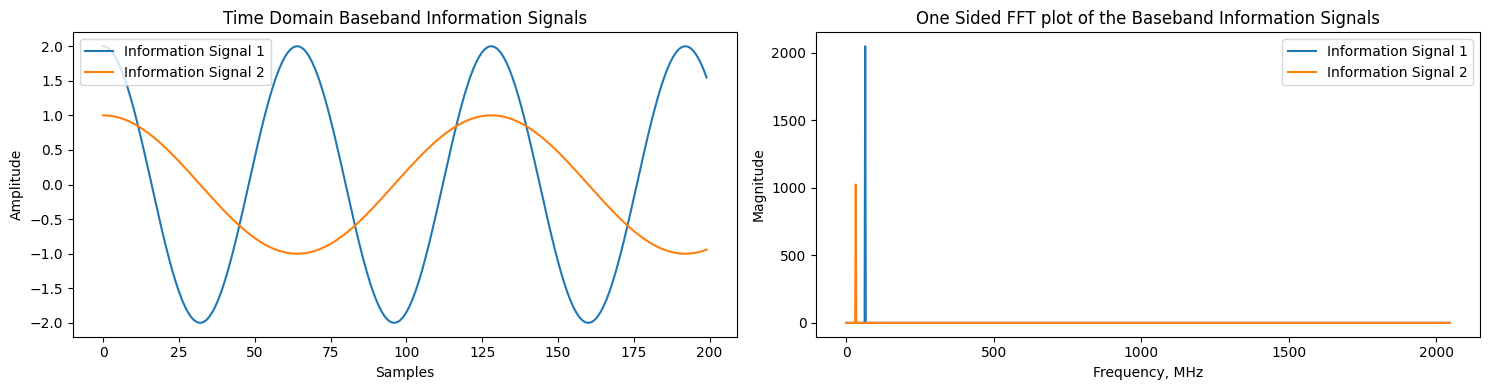

In [5]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(g1[:200])
axs[0].plot(g2[:200])
axs[0].set_title('Time Domain Baseband Information Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('Information Signal 1', 'Information Signal 2'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Baseband Information Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('Information Signal 1', 'Information Signal 2'))
fig.tight_layout()

Эти два информационных сигнала смешиваются (модулируются) с использованием синфазных и квадратурных несущих для получения модулированных сигналов, сдвинутых по фазе на 90 градусов.

$$
s_{1}(t) = g_{1}(t) \cos(2 \pi f_{c} t)
$$

$$
s_{2}(t) = -g_{2}(t) \sin(2 \pi f_{c} t)
$$

Несущая частота $f_{c}$ такая же, как и в предыдущем [примере](https://gitlab.com/klindashian/sdr_lab/-/blob/main/RFSoC_SDR/01_amplitude_modulation.ipynb).

In [6]:
fc = 1400e6 # Carrier Frequency 

# модулированные сигналы I и Q
s1 = g1*np.cos(2*np.pi*fc*t)
s2 = -g2*np.sin(2*np.pi*fc*t)

In [7]:
# Find FFT of modulated signals
s1_fft_result = np.fft.fft(s1, N_fft)
s2_fft_result = np.fft.fft(s2, N_fft)

Теперь мы можем построить модулируемые сигналы I и Q. Видно, что полоса пропускания равна $2f_{b}$, поскольку мы можем видеть максимальные и минимальные частотные характеристики в точках $f_{c} - f_{b1}$ и $f_{c} + f_{b1}. $ соответственно.

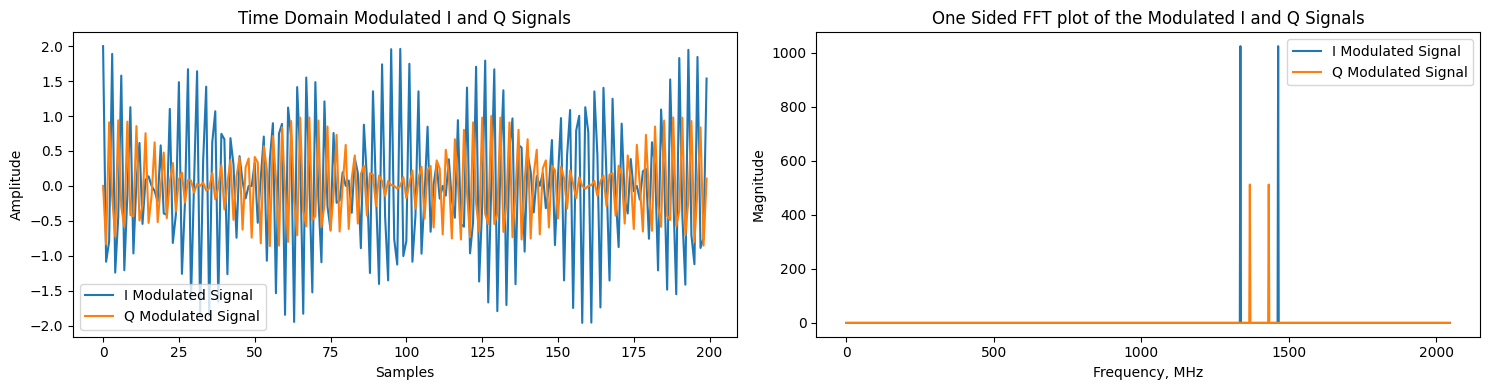

In [8]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(s1[:200])
axs[0].plot(s2[:200])
axs[0].set_title('Time Domain Modulated I and Q Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Modulated Signal', 'Q Modulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(s1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(s2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Modulated I and Q Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('I Modulated Signal', 'Q Modulated Signal'))
fig.tight_layout()

Затем эти сигналы можно суммировать, чтобы создать один сигнал $y(t)$, который содержит оба информационных сигнала.

$$
y(t) = g_{1}(t) \cos(2 \pi f_{c} t) - g_{2}(t) \sin(2 \pi f_{c} t)
$$

Таким образом, два сигнала могут быть переданы с использованием полосы пропускания $2f_{b}$.



In [9]:
# суммирование двух сигналов
y = s1 + s2 # sum of modulated signals

In [10]:
# Find FFT of Summed Signal
y_fft_result = np.fft.fft(y, N_fft)

Построение модулированного сигнала:

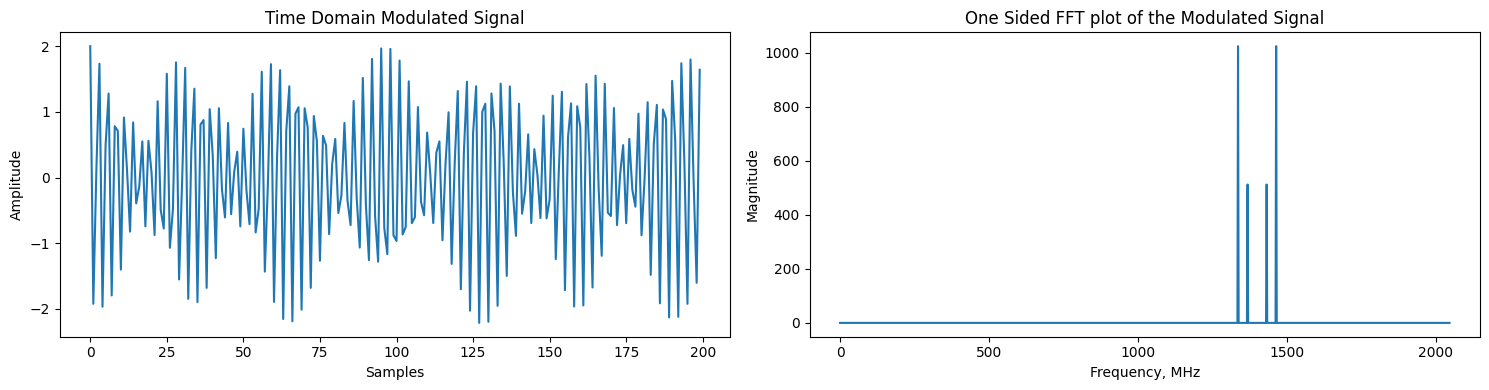

In [11]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(y[:200])
axs[0].set_title('Time Domain Modulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(y_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

По полученному результату видно, что как во временной, так и в частотной области новый сигнал $y(t)$ представляет собой сумму $s_{1}(t)$ и $s_{2}(t)$.

## 3. QAM демодуляция <a class="anchor" id="QAM_demod"></a>

В приемнике квадратурная демодуляция включает умножение принятого сигнала на синусоидальные и косинусоидальные члены. Приемник QAM можно увидеть на рисунке 2.

<figure>
<img src='./images/QAM_demodulation.svg' width='70%'/>
    <figcaption><b>Figure 2: QAM demodulation architecture.</b></figcaption>
</figure>

Для канала In Phase I выход смесителя равен:

$$
x_{1}(t) = y(t) \cos(2 \pi f_{c} t),
$$

$$
x_{1}(t) = 0.5 g_{1}(t) + 0.5g_{1}(t) \cos(4 \pi f_{c} t) - 0.5 g_{2}(t) \sin (4 \pi f_{c} t).
$$

Аналогично, для канала квадратурной фазы Q выходной сигнал после смесителя равен:

$$
x_{2}(t) = y(t)( -\sin(2 \pi f_{c} t)),
$$

$$
x_{2}(t) = 0.5g_{2}(t) - 0.5g_{1}(t) \sin(4 \pi f_{c} t) + 0.5g_{2}(t) \cos (4 \pi f_{c} t).
$$

In [12]:
# Find demodulated signals - y(t)*(I or Q carrier)
x1 = y*np.cos(2*np.pi*fc*t) # I demodulated signal
x2 = y*(-np.sin(2*np.pi*fc*t)) # Q demodulated signal

In [13]:
# Find FFT of demodulated signals
x1_fft_result = np.fft.fft(x1, N_fft)
x2_fft_result = np.fft.fft(x2, N_fft)

Построение графиков:

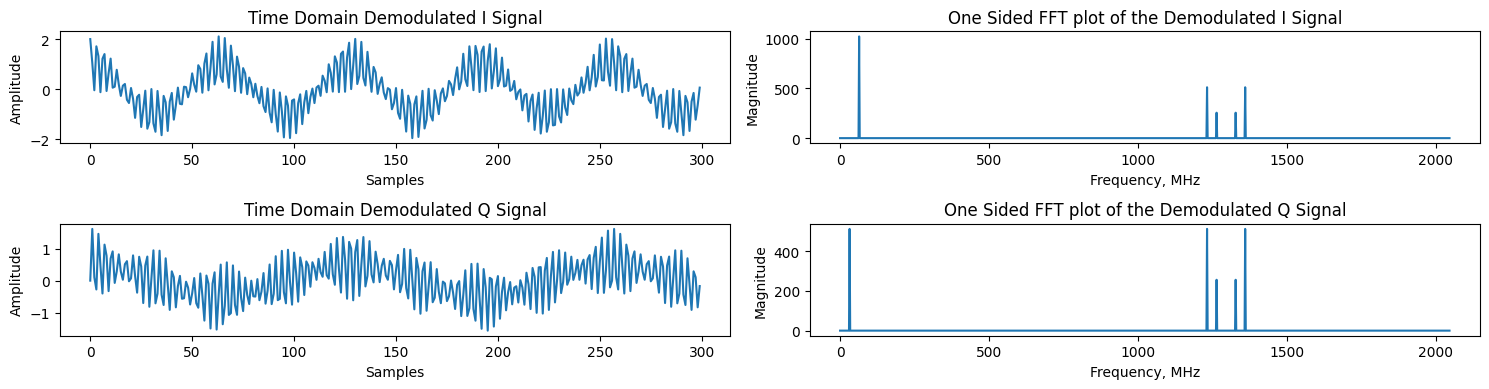

In [14]:
fig, axs = plt.subplots(2,2, figsize=(15,4))
axs[0, 0].plot(x1[:300])
axs[0, 0].set_title('Time Domain Demodulated I Signal')
axs[0, 0].set_xlabel('Samples')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(x1_fft_result[:int(N_fft/2)]))
axs[0, 1].set_title('One Sided FFT plot of the Demodulated I Signal')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlabel('Frequency, MHz')

axs[1, 0].plot(x2[:300])
axs[1, 0].set_title('Time Domain Demodulated Q Signal')
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(x2_fft_result[:int(N_fft/2)]))
axs[1, 1].set_title('One Sided FFT plot of the Demodulated Q Signal')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Результирующие графики демонстрируют, что желаемые частотные компоненты основной полосы были восстановлены. Однако нежелательные высокочастотные компоненты все еще присутствуют в сигнале.

Фильтры нижних частот используются для удаления высокочастотных составляющих, чтобы информация могла быть полностью восстановлена, как и при амплитудной модуляции.

In [16]:
# Добавление ФНЧ
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [19]:
# Применим фильтр к демодулированным сигналам с помощью свертки
z1 = np.convolve(x1, h)
z2 = np.convolve(x2, h)

In [18]:
# БПФ
z1_fft_result = np.fft.fft(z1, N_fft)
z2_fft_result = np.fft.fft(z2, N_fft)

Построение сигналов во временной и частотной областях после фильтрации:

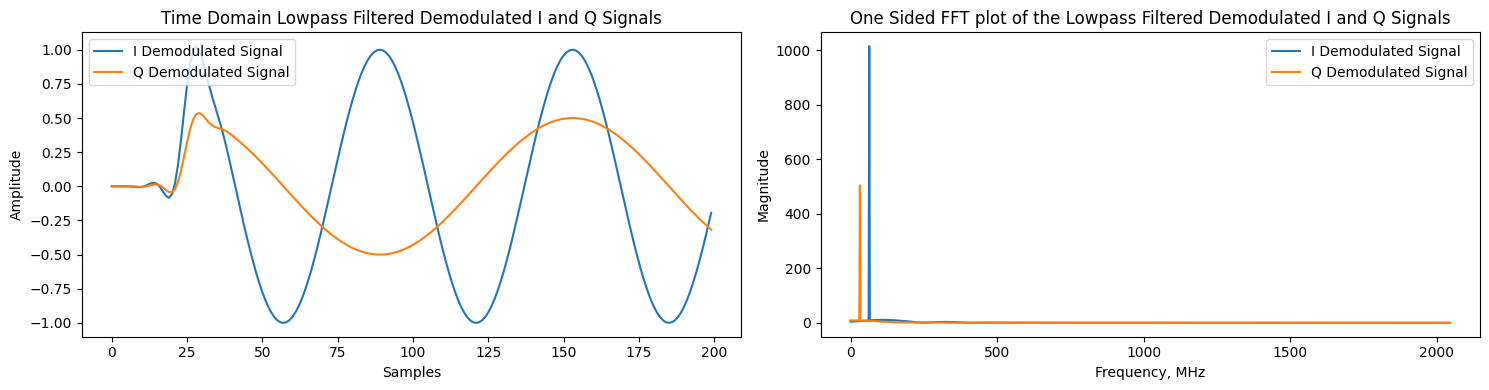

In [20]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].plot(z1[:200])
axs[0].plot(z2[:200])
axs[0].set_title('Time Domain Lowpass Filtered Demodulated I and Q Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z1_fft_result[:int(N_fft/2)]))
axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z2_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass Filtered Demodulated I and Q Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
axs[1].legend(('I Demodulated Signal', 'Q Demodulated Signal'))
fig.tight_layout()


Оба входных информационных сигнала были сохранены. Однако амплитуда сигналов уменьшилась вдвое. Амплитуда уменьшается вдвое, поскольку QAM по-прежнему является формой амплитудной модуляции, и мы допускаем, что при реконструкции произойдет потеря амплитуды. Потерю амплитуды можно легко исправить, применив усиление.

Мы видим, что окончательные сигналы можно представить как:

$$
z_{1}(t) = 0.5g_{1}(t),
$$

$$
z_{2}(t) = 0.5g_{2}(t).
$$

## 4. Phase Error With QAM <a class="anchor" id="QAM_phase_error"></a>

Если гетеродин приемника сдвинут на $\theta$ относительно принимаемого сигнала, то выходные сигналы I и Q будут смешаны.

Для канала I фазовый сдвиг определяется как:

$$
x_{1}(t) = y(t) \cos(2 \pi f_{c} t + \theta),
$$

$$
x_{1}(t) = 0.5 [g_{1}t \cos(\theta) + g_{2}(t) \sin(\theta)].
$$

Для Q канала:

$$
x_{2}(t) = y(t) (-\sin(2 \pi f_{c} t + \theta)),
$$

$$
x_{2}(t) = 0.5 [-g_{1}t \sin(\theta) + g_{2}(t) \cos(\theta)].
$$

In [21]:
# задержка по фазе
phaseshift = (np.pi/3) #60 градусов

# добавление сдвинутых несущих I и Q 
x1_phaseshift = y*np.cos(2*np.pi*fc*t + phaseshift)
x2_phaseshift = y*(-np.sin(2*np.pi*fc*t + phaseshift))

# Добавление ФНЧ 
z1_phaseshift = np.convolve(x1_phaseshift, h)
z2_phaseshift = np.convolve(x2_phaseshift, h)

In [22]:
# Find FFT of phase shifted signal
z1_phaseshift_fft_result = np.fft.fft(z1_phaseshift, N_fft)
z2_phaseshift_fft_result = np.fft.fft(z2_phaseshift, N_fft)



Из графиков ниже видно, что частотные компоненты $g_{1}(t)$ и $g_{2}(t)$ присутствуют как в I, так и в Q-каналах. Во временной области можно видеть, что демодулированные фазы I и Q больше не являются простыми синусоидальными волнами – фактически каждая из них теперь состоит из двух разных частот. Это происходит из-за фазового сдвига в гетеродине приемника, вызывающего смешивание фаз I и Q.

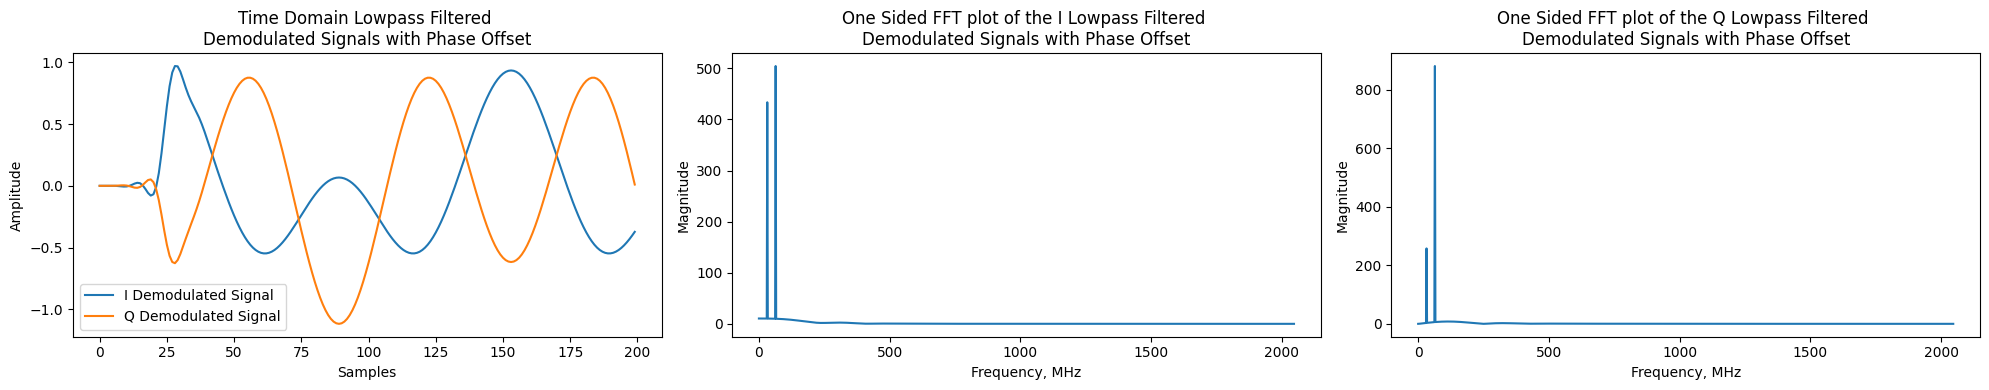

In [23]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(z1_phaseshift[:200])
axs[0].plot(z2_phaseshift[:200])
axs[0].set_title('Time Domain Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z1_phaseshift_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the I Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')

axs[2].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z2_phaseshift_fft_result[:int(N_fft/2)]))
axs[2].set_title('One Sided FFT plot of the Q Lowpass Filtered \nDemodulated Signals with Phase Offset')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')

fig.tight_layout()

Сигналы I и Q мешают друг другу из-за фазовой ошибки. Приёмники DSP могут быть спроектированы так, чтобы вычислять эти фазовые ошибки и корректировать их.

## 5. Заключение <a class="anchor" id="conclusion"></a>

В этом примере была рассмотрена схема модуляции QAM и выяснено, как ее можно использовать для передачи двух информационных сигналов с использованием двух ортогональных несущих на одной и той же частоте. Этот метод повышает эффективность использования полосы пропускания системы радиосвязи. 